# S&P 500 stock data


data from https://www.kaggle.com/camnugent/sandp500

In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
%matplotlib inline

In [191]:
stock = pd.read_csv('data/all_stocks_5yr.csv', sep =',')
stock['date'] = pd.to_datetime(restaurant_orders.date,format='%Y-%m-%d') 
stock.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


**S&P 500 **- 500 крупнейших компаний NYSE и NASDAQ, покрываюших по капитализации 75% всего фондового рынка США.

**Volume** is the number of shares or contracts traded in a security or an entire market during a given period of time. For every buyer, there is a seller, and each transaction contributes to the count of total volume. That is, when buyers and sellers agree to make a transaction at a certain price, it is considered one transaction.

**A stock index** or stock market index is a measurement of a section of the stock market. It is computed from the prices of selected stocks (typically a weighted average). It is a tool used by investors and financial managers to describe the market, and to compare the return on specific investments.

**open** - the index at the opening of an exchange

**high** - the higest index

**low** - the lowest index

**close** - the index at the closing of an exchange

In [192]:
# 500 companies
print(stock['Name'].unique()[0:5])
print("компаний в сыром датасете: ", len(stock['Name'].unique()))
stock['Name'].value_counts()[::50]

['AAL' 'AAPL' 'AAP' 'ABBV' 'ABC']
компаний в сыром датасете:  505


HCN     1259
FFIV    1259
PRGO    1259
ETN     1259
AVY     1259
UNH     1259
IBM     1259
SRE     1259
FITB    1259
DRI     1259
DXC      215
Name: Name, dtype: int64

видим, что не по всем компаниям есть полная информация (1259 строк). Удалим эти объекты из датасета

In [193]:
# Предобработка данных
# словарь датафреймов, разбитый по названиям компаний

normal_data_length = 1259;

stock.index  = stocks.date
comp_data = dict()

for company_name in stock['Name'].unique():
    data = stock.loc[stock['Name'] == company_name]
    if data.shape[0] != normal_data_length:
        continue
    comp_data[company_name] = data
    comp_data[company_name].index  = comp_data[company_name].date
    
print("компаний в обработанном датасете: ", len(comp_data))    

компаний в обработанном датасете:  470



Объем торгов случайных компиний за один и тот же период:

    

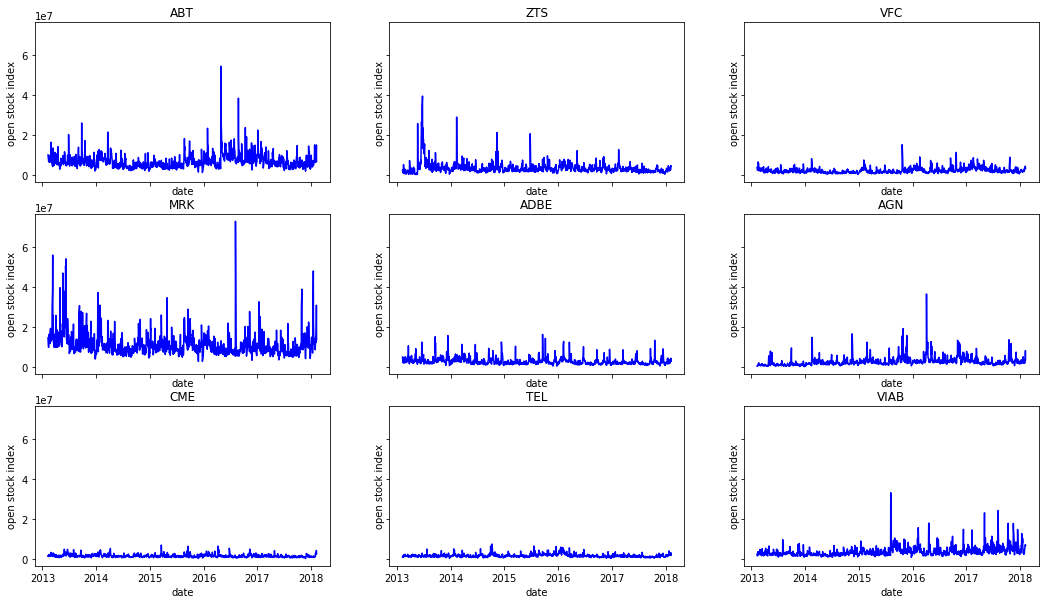

In [194]:
# генерит случайные компании
def rand_keys(some_dict, length):
    if length>len(some_dict):
        return null
    return np.random.permutation([*some_dict])[0:length]   

fig, axes = plt.subplots(3, 3, sharex=True, sharey=True)
fig.set_figheight(10)
fig.set_figwidth(18)

rand_comp = rand_keys(comp_data, 3*3)

for i in range(3):
    for j in range(3):
        name = rand_comp[i*3+j]
        axes[i, j].plot(comp_data[name]['date'], comp_data[name]['volume'], 'b')
        axes[i, j].set_title(name)
        axes[i, j].set_xlabel('date')
        axes[i, j].set_ylabel('open stock index')

**Вывод**: циферки разных компаний не очень похожи, но мы все еще не знаем - насколько

Задача: выяснить, являются ли различия между топ-500 компаний статистически значемыми.

Проверим следующие гипотезу H_0 - выборки взяты из одной совокупности


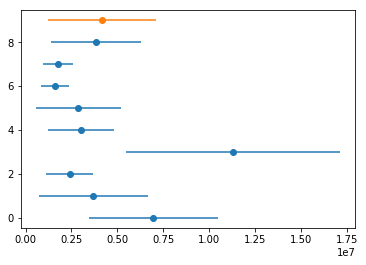

In [196]:
# comp_data['HSY'][::50]
rand_group = list()
[rand_group.append(comp_data[i]['volume']) for i in rand_comp]

x = np.mean(rand_group,axis = 1)
y = np.arange(len(rand_group))
e = np.std(rand_group,axis = 1)

plt.errorbar(x, y, xerr = e, linestyle='None', marker='o')
plt.errorbar(np.mean(x), len(y) ,xerr =  np.std(x), linestyle='None', marker='o')
plt.show()

In [204]:
F, p = stats.f_oneway(*[i for i in rand_group])
print("F =", F)
print("p =", p)

F = 1517.7188771808837
p = 0.0


p - вероятность ошибочно отвергнуть верную нулевую гипотезу, то есть найти различия там, где их нет.
p < 0.05 => выборки взяты из разных распределений => Объем торгов разных компаний существенно отличается


**Построим предсказание средней циферки:**


In [288]:
# создаем даафрейм из средних згначений циферки на момент открытия биржи
mean_index = list()
date = list(comp_data['AAL']['date'])
mean_open_inx = np.sum([comp_data[name]['open'] for name in comp_data], axis = 0) / len(comp_data)
# mean_inx_data = pd.DataFrame(data = np.array(list(zip(date,mean_open_inx))), columns = ['date','open_index'])
mean_inx_data = pd.DataFrame({'date':date, 'open_index': mean_open_inx})
mean_inx_data.head()

,date,open_index
0,2013-02-08,58.286918
1,2013-02-11,58.575180
2,2013-02-12,58.539870
3,2013-02-13,58.696529
4,2013-02-14,58.507057


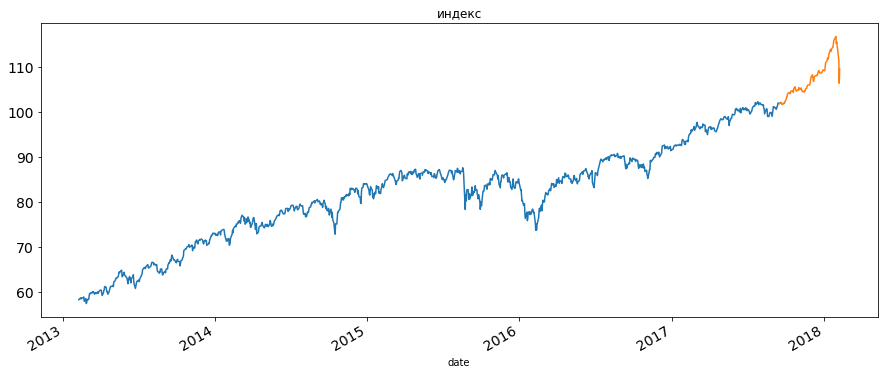

In [289]:
mean_inx_data.index  = mean_inx_data.date
train = mean_inx_data[:-100]
test = mean_inx_data[-100:]
train.open_index.plot( figsize=(15,6),title= 'индекс', fontsize=14)
test.open_index.plot( figsize=(15,6),title= 'индекс', fontsize=14)

In [290]:
# STL-декомпозиция ряда
plt.rcParams['figure.figsize'] = 12, 7
sm.tsa.seasonal_decompose(mean_inx_data.open_index).plot()
plt.show()

ValueError: This function does not handle missing values